# Multinomial Naïve Bayes Classifier - the YouTube Dataset

### Introducing the database

The database for this example is taken from https://archive.ics.uci.edu/ml/machine-learning-databases/00380/ 

### Importing the necessary libraries

In [63]:
import pandas as pd
import glob

import matplotlib.pyplot as plt

import numpy as np

### Reading the database

In [4]:
files = glob.glob('youtube-dataset/*.csv')
files

['youtube-dataset/Youtube01.csv',
 'youtube-dataset/Youtube02.csv',
 'youtube-dataset/Youtube03.csv',
 'youtube-dataset/Youtube04.csv',
 'youtube-dataset/Youtube05.csv']

In [8]:
all_df = []

for i in files:
    all_df.append(pd.read_csv(i).drop(['COMMENT_ID', 'AUTHOR', 'DATE'], axis = 1))

In [9]:
all_df[0]

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,watch?v=vtaRGgvGtWQ Check this out .﻿,1
4,"Hey, check out my new website!! This site is a...",1
...,...,...
344,How can this have 2 billion views when there's...,0
345,I don't now why I'm watching this in 2014﻿,0
346,subscribe to me for call of duty vids and give...,1
347,hi guys please my android photo editor downloa...,1


In [11]:
data = pd.concat(all_df, axis = 0 , ignore_index = True)
data

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,watch?v=vtaRGgvGtWQ Check this out .﻿,1
4,"Hey, check out my new website!! This site is a...",1
...,...,...
1950,I love this song because we sing it at Camp al...,0
1951,I love this song for two reasons: 1.it is abou...,0
1952,wow,0
1953,Shakira u are so wiredo,0


In [13]:
data.isnull().sum()

CONTENT    0
CLASS      0
dtype: int64

In [14]:
data['CLASS'].value_counts()

CLASS
1    1004
0     951
Name: count, dtype: int64

### Importing the necessary ML libraries

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

### Defining the inputs and the target. Creating the train-test split.

In [21]:
inputs = data['CONTENT']
target = data['CLASS']

In [31]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target,
                                                    test_size = 0.2,
                                                    random_state = 365,
                                                    stratify = target)

In [39]:
y_train.value_counts()

CLASS
1    803
0    761
Name: count, dtype: int64

In [33]:
y_test.value_counts(normalize = True)

CLASS
1    0.514066
0    0.485934
Name: proportion, dtype: float64

### Tokenizing the YouTube comments

In [35]:
vectorizer = CountVectorizer()

In [36]:
x_train_transform = vectorizer.fit_transform(x_train)
x_test_transform = vectorizer.transform(x_test)

In [37]:
x_train_transform.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [38]:
x_train_transform.shape

(1564, 3925)

In [40]:
x_test_transform.shape

(391, 3925)

### Performing the classification

In [68]:
clf = MultinomialNB(class_prior = np.array([0.6, 0.4]))

In [69]:
clf.fit(x_train_transform, y_train)

MultinomialNB(class_prior=array([0.6, 0.4]))

In [75]:
clf.get_params()

{'alpha': 1.0,
 'class_prior': array([0.6, 0.4]),
 'fit_prior': True,
 'force_alpha': True}

### Performing the evaluation on the test dataset

In [70]:
y_test_pred = clf.predict(x_test_transform)

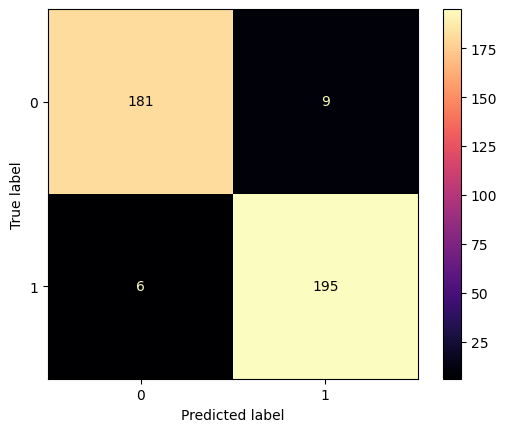

In [71]:
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    labels = clf.classes_,
    cmap = 'magma'
)

In [72]:
print(classification_report(y_test, y_test_pred, target_names=['Ham', 'Spam']))

              precision    recall  f1-score   support

         Ham       0.97      0.95      0.96       190
        Spam       0.96      0.97      0.96       201

    accuracy                           0.96       391
   macro avg       0.96      0.96      0.96       391
weighted avg       0.96      0.96      0.96       391



### Creating probability-distribution figures

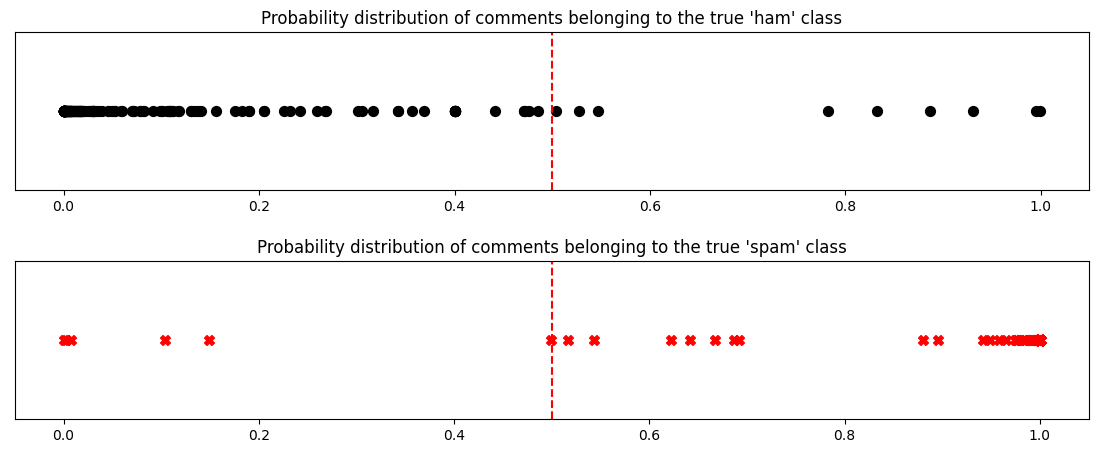

In [73]:
spam_proba = clf.predict_proba(x_test_transform).round(3)[:,1];

df_scatter = pd.DataFrame()

df_scatter['True class'] = y_test
df_scatter['Predicted class'] = y_test_pred
df_scatter['Predicted probability (spam)'] = spam_proba

df_scatter = df_scatter.reset_index(drop = True)

# Assuming `df_scatter` is already defined with the necessary data
df_scatter_0 = df_scatter[df_scatter['True class'] == 0].reset_index(drop=True)
df_scatter_1 = df_scatter[df_scatter['True class'] == 1].reset_index(drop=True)

# Define colors for the classes
color_0 = '#000000'  # Black for 'ham'
color_1 = '#FF0000'  # Red for 'spam'

# Set up the plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 5))
fig.tight_layout(pad=3)

# Plot for 'ham' class
ax1.scatter(
    df_scatter_0['Predicted probability (spam)'], 
    np.zeros(df_scatter_0.shape[0]), 
    c=color_0, 
    s=50, 
    label='True class: Ham', 
    marker='o'
)
ax1.set_title("Probability distribution of comments belonging to the true 'ham' class")
ax1.axvline(x=0.5, color='red', linestyle='dashed')
ax1.set_yticks([])

# Plot for 'spam' class
ax2.scatter(
    df_scatter_1['Predicted probability (spam)'], 
    np.zeros(df_scatter_1.shape[0]), 
    c=color_1, 
    s=50, 
    label='True class: Spam', 
    marker='X'
)
ax2.set_title("Probability distribution of comments belonging to the true 'spam' class")
ax2.axvline(x=0.5, color='red', linestyle='dashed')
ax2.set_yticks([])

# Show the plot
plt.show()


### Making predictions

In [76]:
predict_data = vectorizer.transform(['This song is amazing',
                                     'You can win 1m dolar right now, just click here!!',
                                     'I need your help, my familly is starving.',
                                     'omg, that was great!'])

In [77]:
clf.predict(predict_data)

array([0, 1, 1, 0], dtype=int64)